In [1]:
import pandas as pd

In [2]:
lat_ATTO = -2.1457
lon_ATTO = - 59.0048

_dic = dict(Amazon={'lat': lat_ATTO, 'lon': lon_ATTO},
           )
collocate_locations = pd.DataFrame.from_dict(_dic)
collocate_locations

,Amazon
lat,-2.1457
lon,-59.0048


In [3]:
from sect_sens.util.Nd.sizedist_class_v2 import SizedistributionSurface, SizedistributionStation

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/


In [4]:
from sect_sens.util.plot import plot_profiles

from sect_sens.util.naming_conventions import var_info

from sect_sens.util.imports import get_averaged_fields

from IPython import get_ipython
from useful_scit.imps import (plt)
from matplotlib.lines import Line2D
import seaborn as sns

from sect_sens.data_info.simulation_types import get_diff_by_type, get_casen_by_type_mod
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr
from sect_sens.util.plot.colors import get_case_col
from sect_sens.util.plot.plot_maps import plot_map_diff, plot_map

from sect_sens.constants import get_plotpath, path_data_info
from sect_sens.util.practical_functions import make_folders
import cartopy.crs as ccrs
from matplotlib import gridspec
from matplotlib import colors

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [6]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0008-12'

In [7]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'

## Cases

In [8]:
cases_sec = [
    'SECTv21_ctrl_koagD',
    #'NF1850_SECT_ctrl',
    #'NF1850_SECT_gord',
    #'NF1850_aeroxid2014_SECT_ctrl',
    #'NF1850_aeroxid2014_SECT_gord'
]
cases_orig = [
    #'NF1850_noSECT_def',
    'noSECTv21_default_dd',
    'noSECTv21_ox_ricc_dd',
    
#    'NF1850_aeroxid2014_noSECT_def',
#    'NF1850_aeroxid2014_noSECT_ox_ricc',
    #'NF1850_noSECT_ox_ricc',
    #'NF1850_noSECT_ox_gord',
    #'NF1850_aeroxid2014_noSECT_ox_ricc_test_gordon',
]

cases_pd = cases_orig + cases_sec

## Cases

In [9]:
cases = cases_pd #+ cases_pi

In [10]:
from pathlib import Path

In [11]:
version = 'pd_amazon'
plot_path = get_plotpath('measurement_comp')
filen_base = Path(plot_path + '/%s' % version)
filen_base.mkdir(exist_ok=True)
# print(plot_path)
make_folders(plot_path)

In [12]:
from sect_sens.util.slice_average.avg_pkg import yearly_mean_dic

In [13]:
varl = ['NCONC01','N50','N60','Z3']#,'N60']

In [14]:
cases

['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD']

In [15]:
from sect_sens.util.collocate.collocate import CollocateModel

In [16]:
from sect_sens.data_info.variable_info import sized_varListNorESM,sized_varlist_SOA_SEC, sized_varlist_SO4_SEC

In [17]:
vl = sized_varListNorESM['NCONC']+sized_varListNorESM['NMR']+ sized_varListNorESM['SIGMA']

In [18]:
vl_sec = sized_varlist_SO4_SEC + sized_varlist_SOA_SEC

## Create collocated datasets:

In [19]:
dic_collds = {}

In [20]:
for case in cases_pd:
    print(case)
    _vl = vl
    isSec = (case in cases_sec)
    if isSec:
        _vl = vl + vl_sec
    collmod = CollocateModel(case,
                             startyear, 
                             endyear,
                             isSec,
                             'month',
                             space_res='locations',
                             locations = collocate_locations
               #[5,39.6],
               #False,
              )
    collmod.locations = collocate_locations
    try:
        _ds = collmod.collocate_dataset_vars(_vl)
    except:
        collmod.load_raw_ds(_vl)
        _ds = collmod.collocate_dataset_vars(_vl)
    dic_collds[case] = _ds#.copy()
#collmod.get

noSECTv21_default_dd
noSECTv21_ox_ricc_dd
SECTv21_ctrl_koagD


In [21]:
import xarray as xr

In [22]:
dic_sdist = {}
dic_ds={}

for case in cases_pd:
    print(case)
    _vl = vl
    isSec = (case in cases_sec)
    if isSec:
        _vl = vl + vl_sec
    sdist = SizedistributionStation.SizedistributionStation(
        case,
        startyear, 
        endyear,
        [5,39.6],
        isSec,
        'month',
        locations=collocate_locations,
        
    )
    sdist.get_collocated_dataset(vl)
    
    ds = sdist.compute_sizedist_tot()
    for var in ['dNdlogD_mode01','dNdlogD_mode04','dNdlogD_mode02',
            'dNdlogD_mode05','dNdlogD_mode06','dNdlogD_mode07',
            'dNdlogD_mode08','dNdlogD_mode09','dNdlogD_mode10'
           ,'dNdlogD_mode12','dNdlogD_mode14']:
        ds[var] = sdist.compute_sizedist_mod_var(var)[var]
    dic_ds[case] = ds.copy()
    dic_sdist[case] = sdist

noSECTv21_default_dd
['NCONC01', 'NCONC02', 'NCONC04', 'NCONC05', 'NCONC06', 'NCONC07', 'NCONC08', 'NCONC09', 'NCONC10', 'NCONC12', 'NCONC14', 'NMR01', 'NMR02', 'NMR04', 'NMR05', 'NMR06', 'NMR07', 'NMR08', 'NMR09', 'NMR10', 'NMR12', 'NMR14', 'SIGMA01', 'SIGMA02', 'SIGMA04', 'SIGMA05', 'SIGMA06', 'SIGMA07', 'SIGMA08', 'SIGMA09', 'SIGMA10', 'SIGMA12', 'SIGMA14']
/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//collocated_ds//NorESM/noSECTv21_default_dd/NCONC01_noSECTv21_default_dd_2008-01_2014-12_month_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//collocated_ds//NorESM/noSECTv21_default_dd/NCONC02_noSECTv21_default_dd_2008-01_2014-12_month_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//collocated_ds//NorESM/noSECTv21_default_dd/NCONC04_noSECTv21_default_dd_2008-01_2014-12_month_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//collocated_ds//NorESM/noSECTv21_default_dd/NCONC05_noSECTv21_default_dd_2008-01_2014-12_mont

In [23]:
import xarray as xr

(0.1, 5000.0)

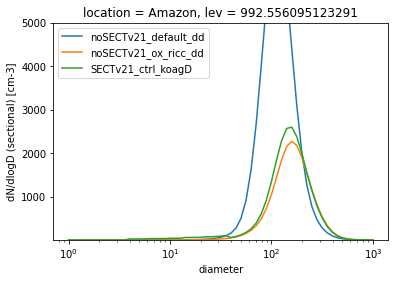

In [24]:
yscale = 'linear'

for case in cases_orig:
    ds= dic_ds[case]
    ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale=yscale, label=case)
for case in cases_sec:
    ds= dic_ds[case]
    (ds['dNdlogD_sec']+ds['dNdlogD_mod']).isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale=yscale, label=case)
plt.legend()
plt.ylim([1e-1,5e3])

In [26]:
ds_obs = xr.open_dataset('tmp_data/amazon_ds.nc')

In [27]:
from sect_sens.data_info import get_nice_name_case

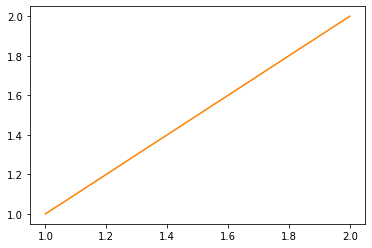

In [28]:

plt.plot([1,2],[1,2],c = get_case_col('OsloAeroSec'))

In [29]:
import numpy as np

In [30]:
np.log(10)

2.302585092994046

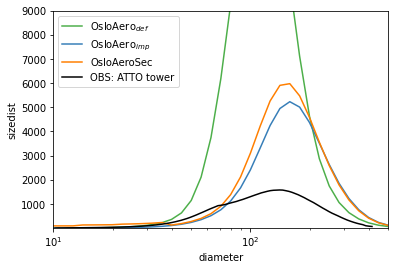

In [31]:
yscale = 'linear'

cndic = dict(noSECTv21_default_dd='OsloAero$_{def}$',
            noSECTv21_ox_ricc_dd = 'OsloAero$_{imp}$')

for case in cases_orig:
    ds= dic_ds[case]
    (np.log(10)*ds['dNdlogD_mod']).isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale=yscale, label=cndic[case], c = get_case_col(cndic[case]))
for case in cases_sec:
    ds= dic_ds[case]
    (np.log(10)*(ds['dNdlogD_sec']+ds['dNdlogD_mod'])).isel(location=0,lev=-1).mean('time').plot(xscale='log', c = get_case_col('OsloAeroSec'),
                                                                                    yscale=yscale, label='OsloAeroSec')
plt.ylim([5,9e3])
plt.xlim([10,500])
#plt.yscale('log')
ds_obs['sizedist'].mean('Date').plot(xscale='log', c='k', label='OBS: ATTO tower')#x='diameter',robust = True)
plt.legend()

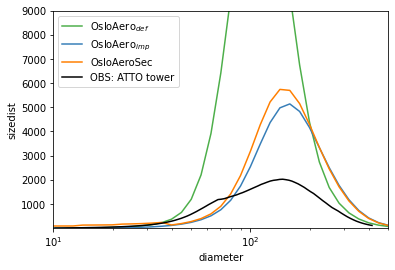

In [32]:
yscale = 'linear'

cndic = dict(noSECTv21_default_dd='OsloAero$_{def}$',
            noSECTv21_ox_ricc_dd = 'OsloAero$_{imp}$')

for case in cases_orig:
    ds= dic_ds[case]
    (np.log(10)*ds['dNdlogD_mod']).isel(location=0,lev=-1).sel(time = slice('2014-01-01','2015-01-01')).mean('time').plot(xscale='log', yscale=yscale, label=cndic[case], c = get_case_col(cndic[case]))
for case in cases_sec:
    ds= dic_ds[case]
    (np.log(10)*(ds['dNdlogD_sec']+ds['dNdlogD_mod'])).isel(location=0,lev=-1).sel(time = slice('2014-01-01','2015-01-01')).mean('time').plot(xscale='log', c = get_case_col('OsloAeroSec'),
                                                                                    yscale=yscale, label='OsloAeroSec')
plt.ylim([5,9e3])
plt.xlim([10,500])
#plt.yscale('log')
ds_obs['sizedist'].sel(Date = slice('2014-01-01','2015-01-01')).mean('Date').plot(xscale='log', c='k', label='OBS: ATTO tower')#x='diameter',robust = True)
plt.legend()

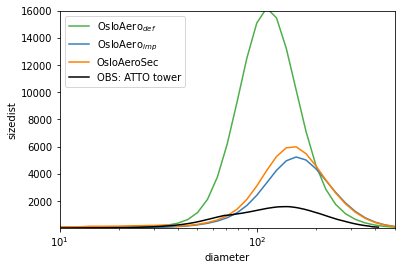

In [33]:
yscale = 'linear'

cndic = dict(noSECTv21_default_dd='OsloAero$_{def}$',
            noSECTv21_ox_ricc_dd = 'OsloAero$_{imp}$')

for case in cases_orig:
    ds= dic_ds[case]
    (np.log(10)*ds['dNdlogD_mod']).isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale=yscale, label=cndic[case], c = get_case_col(cndic[case]))
for case in cases_sec:
    ds= dic_ds[case]
    (np.log(10)*(ds['dNdlogD_sec']+ds['dNdlogD_mod'])).isel(location=0,lev=-1).mean('time').plot(xscale='log', c = get_case_col('OsloAeroSec'),
                                                                                    yscale=yscale, label='OsloAeroSec')
plt.ylim([5,16e3])
plt.xlim([10,500])
#plt.yscale('log')
ds_obs['sizedist'].mean('Date').plot(xscale='log', c='k', label='OBS: ATTO tower')#x='diameter',robust = True)
plt.legend()

In [34]:
ds['dNdlogD_mod'].sel(lev=slice(970,1000)).mean('lev').mean('time')

<xarray.DataArray 'dNdlogD_mod' (location: 2, diameter: 61)>
array([[3.23864471e-09, 9.30306807e-09, 5.55086654e-08, 1.19478073e-07,
        4.56883496e-07, 1.42919429e-06, 3.83206104e-06, 9.09828228e-06,
        2.78494909e-05, 7.21940136e-05, 2.11546159e-04, 4.22972380e-04,
        1.13818965e-03, 2.61280095e-03, 5.31425452e-03, 1.10123869e-02,
        2.26011971e-02, 4.50652539e-02, 8.07214476e-02, 1.49135887e-01,
        2.61926597e-01, 4.37705021e-01, 7.21040150e-01, 1.12584785e+00,
        1.75755213e+00, 2.60568342e+00, 3.77671050e+00, 5.53687332e+00,
        7.98687583e+00, 1.17102644e+01, 1.72524740e+01, 2.60002068e+01,
        3.92438945e+01, 5.97261443e+01, 9.00963008e+01, 1.36710404e+02,
        2.10988571e+02, 3.31801553e+02, 5.27537182e+02, 8.29359105e+02,
        1.24310420e+03, 1.72214442e+03, 2.16545224e+03, 2.44626379e+03,
        2.48136211e+03, 2.27056871e+03, 1.89417918e+03, 1.46061966e+03,
        1.05743085e+03, 7.25273370e+02, 4.71460138e+02, 2.89172726e+02,
        1.66194087e+02, 8.91525881e+01, 4.49085213e+01, 2.16978499e+01,
        1.04804095e+01, 5.39772576e+00, 3.10926882e+00, 1.99442870e+00,
        1.36807799e+00],
       [4.15476806e-09, 1.19850333e-08, 7.21545438e-08, 1.56043053e-07,
        6.02657515e-07, 1.90510333e-06, 5.16485472e-06, 1.24052341e-05,
        3.86704385e-05, 1.02189842e-04, 3.07639625e-04, 6.28286329e-04,
        1.75428276e-03, 4.18584116e-03, 8.86220273e-03, 1.93003912e-02,
        4.20450280e-02, 8.98809489e-02, 1.72758774e-01, 3.48692881e-01,
        6.74481720e-01, 1.24966577e+00, 2.31215691e+00, 4.06167771e+00,
        7.22345002e+00, 1.21039940e+01, 1.96819762e+01, 3.21131895e+01,
        5.00999076e+01, 7.68766679e+01, 1.13758612e+02, 1.65214714e+02,
        2.32051626e+02, 3.19039988e+02, 4.25567653e+02, 5.56533014e+02,
        7.15988112e+02, 9.06201196e+02, 1.12954237e+03, 1.38216083e+03,
        1.63940823e+03, 1.85533216e+03, 1.97556109e+03, 1.95899413e+03,
        1.80027978e+03, 1.53758058e+03, 1.22838620e+03, 9.27377884e+02,
        6.69344673e+02, 4.64470522e+02, 3.09570003e+02, 1.97427198e+02,
        1.19786926e+02, 6.88359372e+01, 3.74668385e+01, 1.94103340e+01,
        9.65967273e+00, 4.71503545e+00, 2.31442172e+00, 1.17029248e+00,
        6.19515887e-01]])
Coordinates:
  * location  (location) object 'Amazon' 'Chacataya'
  * diameter  (diameter) float64 1.0 1.1 1.3 1.4 1.6 ... 708.0 794.3 891.2 1e+03
Attributes:
    raw_data_path:    /home/ubuntu/mnts/nird/projects/model_output/archive/
    model:            NorESM
    model_name:       NorESM
    case_name:        SECTv21_ctrl_koagD
    case:             SECTv21_ctrl_koagD
    case_name_nice:   OsloAeroSec
    isSectional:      True
    from_time:        2008-01
    to_time:          2014-12
    time_resolution:  month
    history_field:    .h0.
    pressure_coords:  False
    long_name:        dN/dlogD (modal)
    units:            cm-3

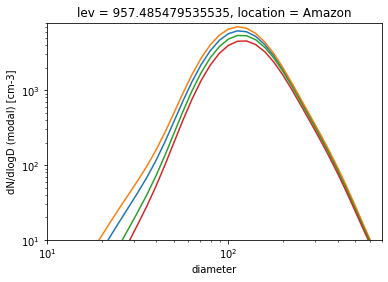

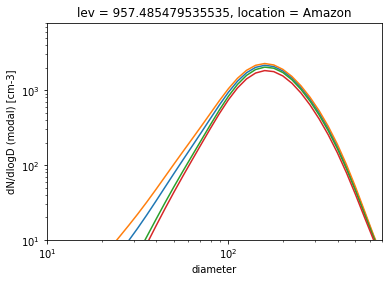

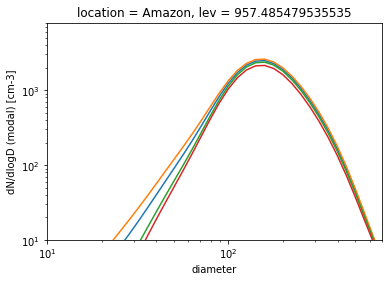

In [35]:
for c in cases:
    ds= dic_ds[c]

    ds['dNdlogD_mod'].sel(lev=slice(970,1000), location='Amazon').mean('lev').mean('time').plot()

    ds['dNdlogD_mod'].isel(lev=-1).sel( location='Amazon').mean('time').plot()
    ds['dNdlogD_mod'].isel(lev=-2).sel( location='Amazon').mean('time').plot()
    ds['dNdlogD_mod'].isel(lev=-3).sel( location='Amazon').mean('time').plot()
    plt.xscale('log')
    plt.xlim([10,700])
    plt.ylim([10,8000])
    plt.ylim([10,8000])
    plt.yscale('log')
    plt.show()

In [36]:
def mean_for_comp(ds, isSec=False, vmon = 'dNdlogD_mod', vsec='dNdlogD_sec'):
    log10 = np.log(10)
    _da = ds[vmon]
    if isSec:
        _da = _da + ds[vsec]
    da_dlog10 = log10*_da
    da_sel = da_dlog10.isel(location=0).sel(lev = slice(980,1000)).mean('lev')
    da_mean = da_sel.mean('time')
    return da_mean

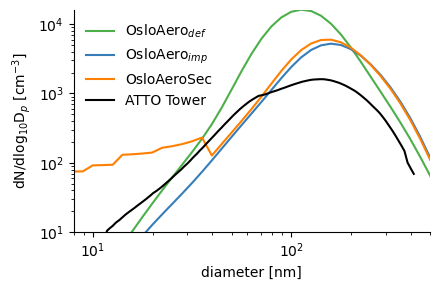

In [37]:
yscale = 'linear'

cndic = dict(noSECTv21_default_dd='OsloAero$_{def}$',
            noSECTv21_ox_ricc_dd = 'OsloAero$_{imp}$')
f, ax = plt.subplots(figsize=[4.5,3], dpi=100)
for case in cases_orig:
    ds= dic_ds[case]
    da = mean_for_comp(ds)
    da.plot(xscale='log', yscale=yscale, label=cndic[case], c = get_case_col(cndic[case]))
for case in cases_sec:
    ds= dic_ds[case]
    da = mean_for_comp(ds, isSec=True)
    
    da.plot(xscale='log', c = get_case_col('OsloAeroSec'),yscale=yscale, label='OsloAeroSec')
plt.ylim([10,16e3])
plt.xlim([8,500])
plt.yscale('log')
#ds_obs['sizedist'].mean('Date').plot(xscale='log', c='k', label='ATTO Tower')#x='diameter',robust = True)
ds_obs['sizedist'].groupby(ds_obs.Date.dt.month).mean().mean('month').plot(xscale='log', c='k', label='ATTO Tower')#x='diameter',robust = True)

plt.legend(frameon=False)
sns.despine(f)
ax.set_ylabel('dN/dlog$_{10}$D$_p$ [cm$^{-3}$]')
ax.set_xlabel('diameter [nm]')

fn = filen_base /'ATTO_sizedist_mean'
f.tight_layout()
f.savefig(fn.with_suffix('.png'))
f.savefig(fn.with_suffix('.pdf'))



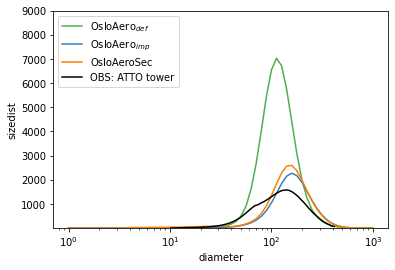

In [38]:
yscale = 'linear'

for case in cases_orig:
    ds= dic_ds[case]
    (ds['dNdlogD_mod']).isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale=yscale, label=cndic[case], c = get_case_col(cndic[case]))
for case in cases_sec:
    ds= dic_ds[case]
    ((ds['dNdlogD_sec']+ds['dNdlogD_mod'])).isel(location=0,lev=-1).mean('time').plot(xscale='log', c = get_case_col('OsloAeroSec'),
                                                                                    yscale=yscale, label='OsloAeroSec')
plt.ylim([5,9e3])
#plt.yscale('log')
ds_obs['sizedist'].mean('Date').plot(xscale='log', c='k', label='OBS: ATTO tower')#x='diameter',robust = True)
plt.legend()

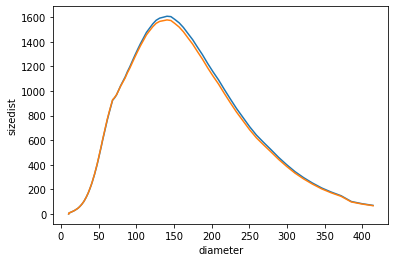

In [39]:
ds_obs.groupby(ds_obs.Date.dt.month).mean().mean('month')['sizedist'].plot()

ds_obs.mean('Date')['sizedist'].plot()

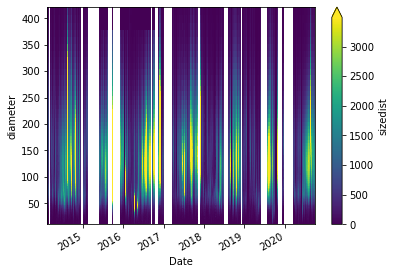

In [40]:
ds_obs['sizedist'].plot(robust=True)

In [41]:
def mean_for_comp_month(ds, isSec=False, vmon = 'dNdlogD_mod', vsec='dNdlogD_sec'):
    log10 = np.log(10)
    _da = ds[vmon]
    if isSec:
        _da = _da + ds[vsec]
    da_dlog10 = log10*_da
    da_sel = da_dlog10.isel(location=0).sel(lev = slice(980,1000)).mean('lev')
    da_mean = da_sel.groupby(da_sel.time.dt.month).mean()
    return da_mean

In [42]:
from matplotlib.colors import LogNorm

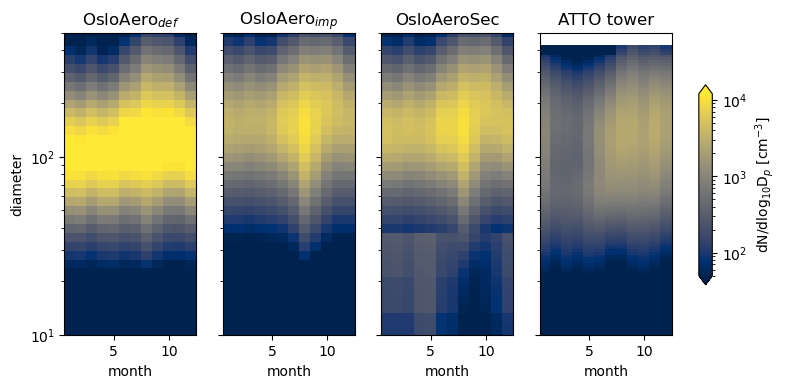

In [43]:
yscale = 'log'
xscale='linear'
f,axs = plt.subplots(1,4, figsize=[9 ,4], sharex=True, sharey=True, dpi=100)
cndic = dict(noSECTv21_default_dd='OsloAero$_{def}$',
            noSECTv21_ox_ricc_dd = 'OsloAero$_{imp}$',
            SECTv21_ctrl_koagD = 'OsloAeroSec')
norm = LogNorm(vmin=50, vmax=12000)

plt_sett = dict(
    norm=norm,
    cmap='cividis',
    yscale=yscale,
    xscale=xscale,
    ylim=[10,500],
    add_colorbar=False,
    rasterized=True
)


for case,ax in zip(cases_orig,axs):
    ds= dic_ds[case]
    da = mean_for_comp_month(ds)
    da.plot(x='month',**plt_sett,ax=ax)#, label=cndic[case], c = get_case_col(cndic[case]))
    ax.set_title(cndic[case])
for case, ax in zip(cases_sec, axs[len(cases_orig):]):
    ds= dic_ds[case]
    da = mean_for_comp_month(ds, isSec=True)
    da.plot(x='month',**plt_sett,ax=ax)#, label=cndic[case], c = get_case_col(cndic[case]))
    ax.set_title(cndic[case])

ax = axs[-1]
im = ds_obs.groupby(ds_obs.Date.dt.month).mean()['sizedist'].plot(x='month',**plt_sett, ax = ax)

for ax in axs[1:].flatten():
    ax.set_ylabel('')
#for ax in axs_ba[-1,:].flatten():
#    ax.set_xlabel('Latitude [$^\circ$ N]')
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.83, 0.25, 0.015, 0.5])

cb = f.colorbar(im, cax=cbar_ax, extend = 'both', label= 'dN/dlog$_{10}$D$_p$ [cm$^{-3}$]' )
ax.set_title('ATTO tower')
#f.tight_layout()
fn = filen_base /'ATTO_sizedist_month'
f.savefig(fn.with_suffix('.png'), bbox_extra_artists=(cb,))
f.savefig(fn.with_suffix('.pdf'), bbox_extra_artists=(cb,))
plt.show()

## Extra: 

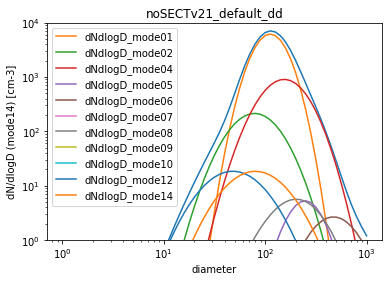

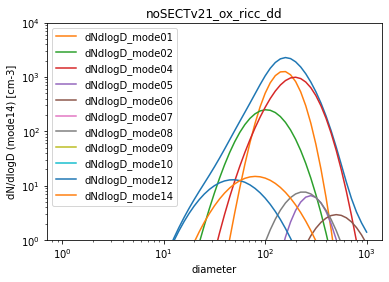

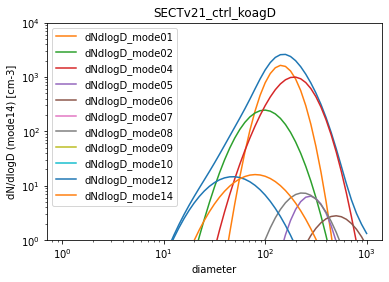

In [44]:
for case in cases_pd:
    ds = dic_ds[case]
    ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')

    for var in [
        'dNdlogD_mode01',
        'dNdlogD_mode02',
        'dNdlogD_mode04',
        'dNdlogD_mode05',
        'dNdlogD_mode06',
        'dNdlogD_mode07',
        'dNdlogD_mode08',
        'dNdlogD_mode09',
        'dNdlogD_mode10',
        'dNdlogD_mode12',
        'dNdlogD_mode14'
    ]:
        ds[var].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log', label=var)
#ds['dNdlogD_mode02'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
#ds['dNdlogD_mode04'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
    plt.legend()
    #plt.yscale('linear')
    plt.ylim([10e-1,1e4])
    plt.title(case)
    plt.show()

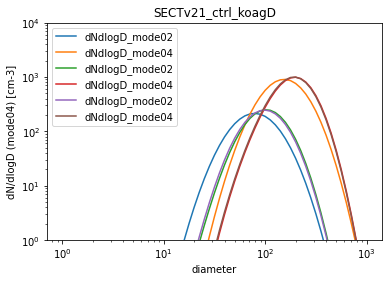

In [45]:
for case in cases_pd:
    ds = dic_ds[case]
    #ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')

    for var in [#'dNdlogD_mode01',
                'dNdlogD_mode02','dNdlogD_mode04',
            #'dNdlogD_mode05','dNdlogD_mode06','dNdlogD_mode07',
            #'dNdlogD_mode08',
            #    'dNdlogD_mode09','dNdlogD_mode10'
           #'dNdlogD_mode12','dNdlogD_mode14'
    ]:
        ds[var].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log', label=var)
#ds['dNdlogD_mode02'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
#ds['dNdlogD_mode04'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
    plt.legend()
    #plt.yscale('linear')
    plt.ylim([10e-1,1e4])
    plt.title(case)
    #plt.show()

(1.0, 700.0)

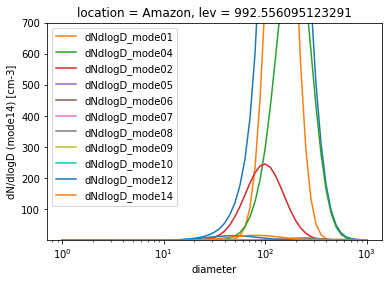

In [46]:
ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')

for var in ['dNdlogD_mode01','dNdlogD_mode04','dNdlogD_mode02',
            'dNdlogD_mode05','dNdlogD_mode06','dNdlogD_mode07',
            'dNdlogD_mode08','dNdlogD_mode09','dNdlogD_mode10'
           ,'dNdlogD_mode12','dNdlogD_mode14']:
    ds[var].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log', label=var)
#ds['dNdlogD_mode02'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
#ds['dNdlogD_mode04'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
plt.legend()
plt.yscale('linear')
plt.ylim([10e-1,7e2])

(1.0, 100000.0)

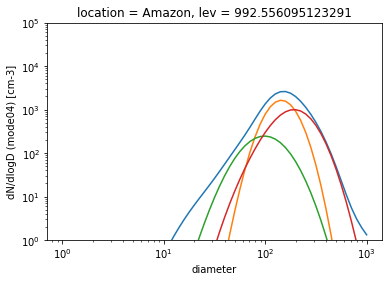

In [47]:
ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
ds['dNdlogD_mode01'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
ds['dNdlogD_mode02'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
ds['dNdlogD_mode04'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
plt.ylim([10e-1,10e4])

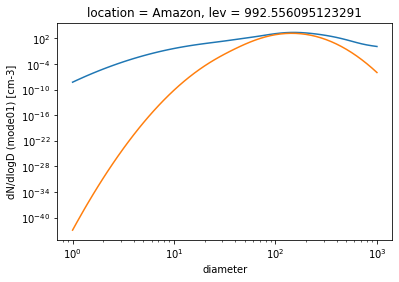

In [48]:
ds['dNdlogD_mod'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')
ds['dNdlogD_mode01'].isel(location=0,lev=-1).mean('time').plot(xscale='log', yscale='log')

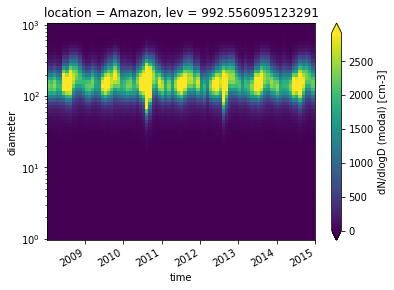

In [50]:
ds['dNdlogD_mod'].sel(location='Amazon').isel(lev=-1).plot(x='time',yscale='log', robust=True)